<a href="https://colab.research.google.com/github/prasadsalwe/Assortment_Rationalization-Python-/blob/main/Assortment_Rationalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Importing the dataset
from google.colab import files
uploaded = files.upload()

Saving AO.xlsx to AO.xlsx


In [4]:
# returns all the files names in the uploaded object
# We got dictionary as a uploaded file
uploaded.keys()

dict_keys(['AO.xlsx'])

In [5]:
# converts file to list
list(uploaded.keys())

['AO.xlsx']

In [6]:
# Naming the list as first_file
first_file = list(uploaded.keys())[0]
first_file

'AO.xlsx'

In [7]:
# Converting list to data frame naming it Grocery Data
Grocery_data = pd.read_excel(first_file)

In [8]:
# Data Familiarization
print(Grocery_data.dtypes)
print(len(Grocery_data.columns))

Product_ID                object
Category                  object
Product_Name              object
Brand                     object
Price                    float64
Cost                     float64
Units_Sold                 int64
SKU                        int64
Shelf_Space              float64
Customer_Ratings         float64
Frequency_of_Purchase      int64
Sales                    float64
Gross_Margin             float64
Total_Customers            int64
Total_Transactions         int64
dtype: object
15


In [9]:
# Defining Key Metrics for further analysis :
# 1.Sales/Total_Customer
# 2.Total_Transaction/Total_Customer
# 3.Customer Rating Proxy -  Frequency_of_Purchase*Customer_Ratings
# 4.Sales/Shelf_Space
# 5.Gross Margin / Shelf_Space
# 6.Unit Sold / Shelf_Space
# 7.Profit / Shelf_Space
# 8.Gross Margin / Units_Sold

In [10]:
# Data Cleaning
print(Grocery_data.isna().sum()) #Counting null values


Product_ID               0
Category                 0
Product_Name             0
Brand                    0
Price                    0
Cost                     0
Units_Sold               0
SKU                      0
Shelf_Space              0
Customer_Ratings         0
Frequency_of_Purchase    0
Sales                    0
Gross_Margin             0
Total_Customers          0
Total_Transactions       0
dtype: int64


In [11]:
# Identifing Outliers
avg_sales = Grocery_data.select_dtypes(include=np.number).mean()
Sales_Deviation = Grocery_data.select_dtypes(include=np.number).std()
low = avg_sales - (3*Sales_Deviation)
high = avg_sales + (3*Sales_Deviation)
Grocery_data[(Grocery_data.select_dtypes(include=np.number)<low) | (Grocery_data.select_dtypes(include=np.number)>high)].sum(axis=0) #| (Grocery_data.select_dtypes(include=np.number)>high)] #Outliers per column

,0
Product_ID,0
Category,0
Product_Name,0
Brand,0
Price,0.0
Cost,0.0
Units_Sold,0.0
SKU,0.0
Shelf_Space,0.0
Customer_Ratings,0.0


In [12]:
x = Grocery_data[(Grocery_data.select_dtypes(include=np.number)<low) | (Grocery_data.select_dtypes(include=np.number)>high)]
outliers = Grocery_data[x.any(axis=1)]
print(outliers)

     Product_ID   Category  Product_Name    Brand  Price   Cost  Units_Sold  \
669      P00670     Frozen   Product 670  Brand A  47.13   1.54        5085   
1170     P01171     Bakery  Product 1171  Brand A  48.75   1.07        4949   
3236     P03237      Dairy  Product 3237  Brand C  49.66   1.07        5045   
4100     P04101     Bakery  Product 4101  Brand A  47.79   3.50        5382   
4672     P04673  Beverages  Product 4673  Brand A  48.82   5.60        5276   
4965     P04966     Frozen  Product 4966  Brand C  48.50   2.91        5239   
4997     P04998     Frozen  Product 4998  Brand D   2.14  37.82        5195   

      SKU  Shelf_Space  Customer_Ratings  Frequency_of_Purchase      Sales  \
669    80         3.85               3.1                     85  239656.05   
1170   40         2.58               2.6                     19  241263.75   
3236   43         3.30               4.8                     85  250534.70   
4100   23         1.28               3.8               

In [13]:
# Dropping Outliers Rows
Grocery_data = Grocery_data.drop([669,1170,3236,4100,4672,4965,4997])

In [14]:
Grocery_data.shape

(4993, 15)

In [15]:
# import plotly.express as px
# fig = px.box(Grocery_data,y="Gross_Margin")
# fig.show()

In [16]:
x = Grocery_data.describe()
x

,Price,Cost,Units_Sold,SKU,Shelf_Space,Customer_Ratings,Frequency_of_Purchase,Sales,Gross_Margin,Total_Customers,Total_Transactions
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.00000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,25.895205,19.452141,3501.176647,54.487883,2.725045,3.76445,54.070098,90759.620743,22734.298015,2536.910274,2791.192870
std,14.784339,11.351245,1159.465185,25.852018,1.388730,0.69046,26.050276,62352.158528,67920.481730,1415.699303,1426.897367
min,1.530000,1.070000,188.000000,10.000000,0.500000,2.50000,10.000000,849.600000,-178830.720000,102.000000,137.000000
25%,14.590000,8.910000,2698.000000,33.000000,1.470000,3.20000,32.000000,34676.600000,-18718.140000,1325.000000,1568.000000
50%,26.630000,18.770000,3674.000000,54.000000,2.820000,3.80000,54.000000,82354.720000,20249.960000,2526.000000,2780.000000
75%,37.970000,29.170000,4470.000000,77.000000,3.920000,4.30000,76.000000,135981.020000,65715.610000,3753.000000,4025.000000
max,49.660000,39.990000,5439.000000,99.000000,5.000000,5.00000,99.000000,263920.920000,225463.020000,4999.000000,5439.000000


In [17]:
# Data Transformation
Grocery_data["Sales_Per_Customer"] = Grocery_data["Sales"]/Grocery_data["Total_Customers"]
Grocery_data["Transaction_Per_Customer"] = Grocery_data["Total_Transactions"]/Grocery_data["Total_Customers"]
Grocery_data["Customer_Rating_Proxy"] = Grocery_data["Frequency_of_Purchase"]*Grocery_data["Customer_Ratings"]
Grocery_data["Sales_Per_Shelf_Space"] = Grocery_data["Sales"]/Grocery_data["Shelf_Space"]
Grocery_data["Gross_Margin_Per_Shelf_Space"] = Grocery_data["Gross_Margin"]/Grocery_data["Shelf_Space"]
Grocery_data["Units_Sold_Per_Shelf_Space"] = Grocery_data["Units_Sold"]/Grocery_data["Shelf_Space"]
Grocery_data["Profit_Per_Shelf_Space"] = (Grocery_data["Price"]-Grocery_data['Cost'])/Grocery_data["Shelf_Space"]
Grocery_data["Gross_Margin_Per_Units_Sold"] = Grocery_data["Gross_Margin"]/Grocery_data["Units_Sold"]
Grocery_data

,Product_ID,Category,Product_Name,Brand,Price,Cost,Units_Sold,SKU,Shelf_Space,Customer_Ratings,...,Total_Customers,Total_Transactions,Sales_Per_Customer,Transaction_Per_Customer,Customer_Rating_Proxy,Sales_Per_Shelf_Space,Gross_Margin_Per_Shelf_Space,Units_Sold_Per_Shelf_Space,Profit_Per_Shelf_Space,Gross_Margin_Per_Units_Sold
0,P00001,Snacks,Product 1,Brand D,37.92,16.16,2242,50,2.23,3.7,...,1988,2242,42.764909,1.127767,229.4,38124.053812,21877.094170,1005.381166,9.757848,21.76
1,P00002,Snacks,Product 2,Brand A,37.56,17.30,3146,57,4.46,3.7,...,1820,2221,64.925143,1.220330,347.8,26494.116592,14291.022422,705.381166,4.542601,20.26
2,P00003,Snacks,Product 3,Brand A,1.56,30.33,2303,48,2.59,4.4,...,2003,2303,1.793650,1.149775,418.0,1387.135135,-25581.972973,889.189189,-11.108108,-28.77
3,P00004,Frozen,Product 4,Brand C,25.23,1.29,2997,14,4.69,4.4,...,323,328,234.100031,1.015480,211.2,16122.454158,15298.119403,639.019190,5.104478,23.94
4,P00005,Dairy,Product 5,Brand B,22.63,4.93,5210,86,3.80,2.7,...,4860,5210,24.259733,1.072016,229.5,31026.921053,24267.631579,1371.052632,4.657895,17.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,P04995,Frozen,Product 4995,Brand C,48.50,36.48,4237,45,1.37,4.0,...,3738,4237,54.974452,1.133494,352.0,149995.985401,37174.262774,3092.700730,8.773723,12.02
4995,P04996,Dairy,Product 4996,Brand A,1.60,35.86,4022,47,2.60,2.7,...,2417,2435,2.662474,1.007447,132.3,2475.076923,-52997.584615,1546.923077,-13.176923,-34.26
4996,P04997,Bakery,Product 4997,Brand A,14.27,2.73,3282,81,4.92,4.0,...,1021,1180,45.870852,1.155730,268.0,9519.134146,7698.024390,667.073171,2.345528,11.54
4998,P04999,Snacks,Product 4999,Brand C,36.02,34.66,3783,48,2.59,4.4,...,3639,3783,37.445359,1.039571,88.0,52611.451737,1986.440154,1460.617761,0.525097,1.36


In [18]:
Grocery_data.columns

Index(['Product_ID', 'Category', 'Product_Name', 'Brand', 'Price', 'Cost',
       'Units_Sold', 'SKU', 'Shelf_Space', 'Customer_Ratings',
       'Frequency_of_Purchase', 'Sales', 'Gross_Margin', 'Total_Customers',
       'Total_Transactions', 'Sales_Per_Customer', 'Transaction_Per_Customer',
       'Customer_Rating_Proxy', 'Sales_Per_Shelf_Space',
       'Gross_Margin_Per_Shelf_Space', 'Units_Sold_Per_Shelf_Space',
       'Profit_Per_Shelf_Space', 'Gross_Margin_Per_Units_Sold'],
      dtype='object')

In [19]:
Grocery_data['Sales']

,Sales
0,85016.64
1,118163.76
2,3592.68
3,75614.31
4,117902.30
...,...
4994,205494.50
4995,6435.20
4996,46834.14
4998,136263.66


In [20]:
import matplotlib.pyplot as plt

In [21]:
# files.download("x.xlsx")

In [22]:
# Converting all numeric columns to float data type
Grocery_data[Grocery_data.select_dtypes(include='number').columns] = \
    Grocery_data.select_dtypes(include='number').astype(float)

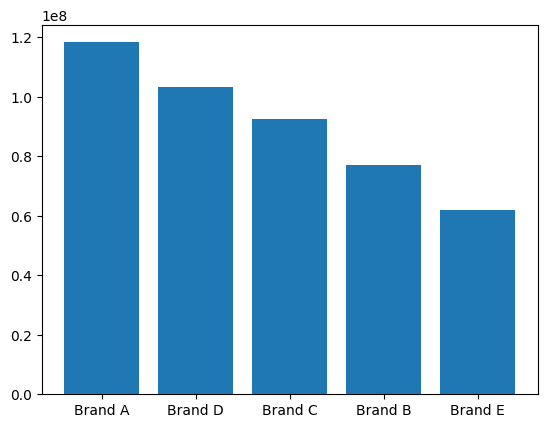

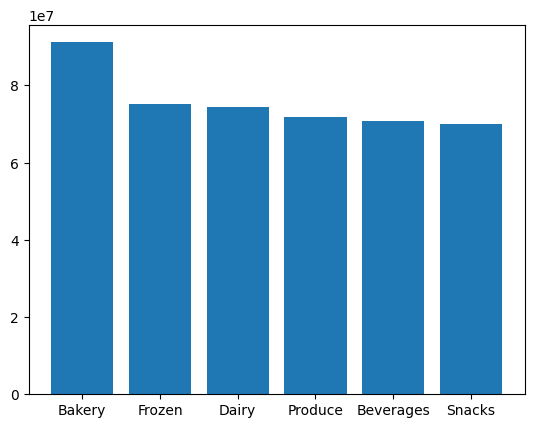

     Brand         Sales  Percentage
0  Brand A  1.183847e+08   26.124096
3  Brand D  1.032021e+08   22.773740
2  Brand C  9.271679e+07   20.459931
1  Brand B  7.695172e+07   16.981032
4  Brand E  6.190748e+07   13.661201
    Category        Sales  Percentage
0     Bakery  91130429.06   20.109866
3     Frozen  75276668.87   16.611397
2      Dairy  74381890.95   16.413945
4    Produce  71722990.52   15.827202
1  Beverages  70628187.01   15.585611
5     Snacks  70022619.96   15.451979
      Brand   Category        Sales  Percentage
0   Brand A     Bakery  23514550.20    5.188985
4   Brand A    Produce  22000578.45    4.854895
18  Brand D     Bakery  21278442.69    4.695541
2   Brand A      Dairy  20241282.79    4.466669
12  Brand C     Bakery  18967864.97    4.185663
3   Brand A     Frozen  18679296.08    4.121984
23  Brand D     Snacks  18137464.45    4.002417
5   Brand A     Snacks  17306545.80    3.819057
13  Brand C  Beverages  16729346.76    3.691686
1   Brand A  Beverages  16642428

In [23]:
# Sales Distribution
BrandSales = Grocery_data.groupby(["Brand"],as_index = False,sort = True)[["Sales"]].sum().assign(Percentage=lambda x: (x["Sales"] / x["Sales"].sum()) * 100).sort_values(["Percentage"],ascending = False)
CategorySales = Grocery_data.groupby(["Category"],as_index = False,sort = True)[["Sales"]].sum().assign(Percentage=lambda x: (x["Sales"] / x["Sales"].sum()) * 100).sort_values(["Percentage"],ascending = False)
BrandCategorySales = Grocery_data.groupby(["Brand","Category"],as_index = False,sort = True)[["Sales"]].sum().assign(Percentage=lambda x: (x["Sales"] / x["Sales"].sum()) * 100).sort_values(["Percentage"],ascending = False)
plt.bar(BrandSales['Brand'],BrandSales['Sales'])
plt.show()
plt.bar(CategorySales['Category'],CategorySales['Sales'])
plt.show()
print(BrandSales)
print(CategorySales)
print(BrandCategorySales)

In [24]:
# Top 25% Performers by Sales
print(BrandSales.loc[BrandSales['Percentage'] > BrandSales['Percentage'].quantile(0.75)])
print(CategorySales.loc[CategorySales['Percentage'] > CategorySales['Percentage'].quantile(0.75)])
print(BrandCategorySales.loc[BrandCategorySales['Percentage'] > BrandCategorySales['Percentage'].quantile(0.75)])

     Brand         Sales  Percentage
0  Brand A  1.183847e+08   26.124096
  Category        Sales  Percentage
0   Bakery  91130429.06   20.109866
3   Frozen  75276668.87   16.611397
      Brand Category        Sales  Percentage
0   Brand A   Bakery  23514550.20    5.188985
4   Brand A  Produce  22000578.45    4.854895
18  Brand D   Bakery  21278442.69    4.695541
2   Brand A    Dairy  20241282.79    4.466669
12  Brand C   Bakery  18967864.97    4.185663
3   Brand A   Frozen  18679296.08    4.121984
23  Brand D   Snacks  18137464.45    4.002417
5   Brand A   Snacks  17306545.80    3.819057


In [25]:
# Bottom 25% Performers by Sales
print(BrandSales.loc[BrandSales['Percentage'] < BrandSales['Percentage'].quantile(0.25)])
print(CategorySales.loc[CategorySales['Percentage'] < CategorySales['Percentage'].quantile(0.25)])
print(BrandCategorySales.loc[BrandCategorySales['Percentage'] < BrandCategorySales['Percentage'].quantile(0.25)])

     Brand        Sales  Percentage
4  Brand E  61907477.29   13.661201
    Category        Sales  Percentage
1  Beverages  70628187.01   15.585611
5     Snacks  70022619.96   15.451979
      Brand   Category        Sales  Percentage
10  Brand B    Produce  12139857.85    2.678918
24  Brand E     Bakery  11465456.81    2.530097
7   Brand B  Beverages  11255002.30    2.483655
11  Brand B     Snacks  11239920.80    2.480327
26  Brand E      Dairy  10607964.86    2.340873
25  Brand E  Beverages   9751365.50    2.151846
29  Brand E     Snacks   9034625.85    1.993682
28  Brand E    Produce   8892995.68    1.962429


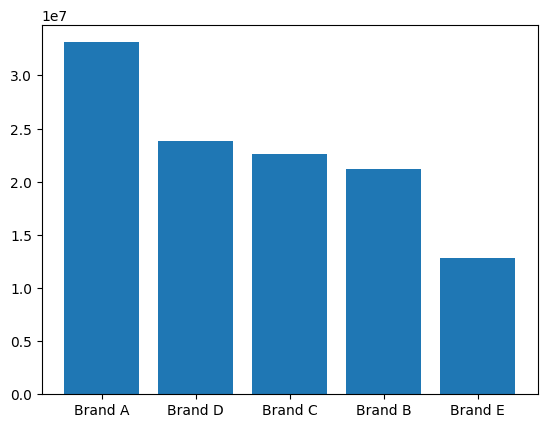

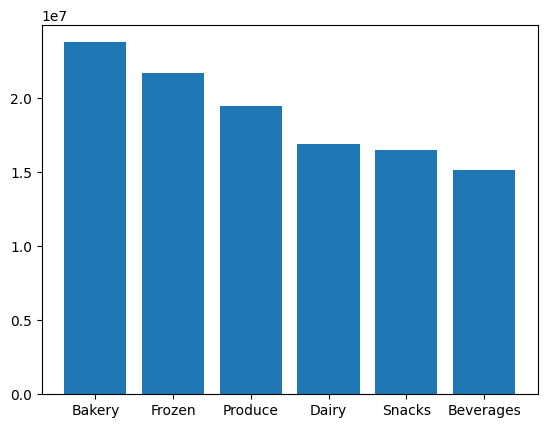

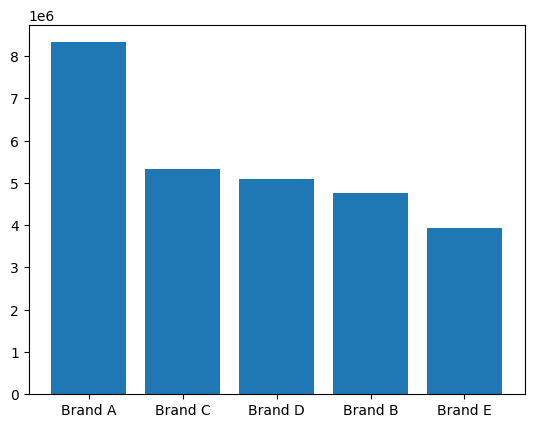

     Brand  Gross_Margin  Percentage
0  Brand A   33117658.59   29.175379
3  Brand D   23833714.67   20.996583
2  Brand C   22577283.00   19.889715
1  Brand B   21156607.11   18.638154
4  Brand E   12827086.62   11.300168
    Category  Gross_Margin  Percentage
0     Bakery   23788271.20   20.956549
3     Frozen   21692363.64   19.110135
4    Produce   19489257.74   17.169284
2      Dairy   16890650.99   14.880012
5     Snacks   16515024.27   14.549099
1  Beverages   15136782.15   13.334921
      Brand   Category  Gross_Margin  Percentage
0   Brand A     Bakery    8323807.36    7.332953
4   Brand A    Produce    6352210.27    5.596052
15  Brand C     Frozen    5324351.37    4.690548
18  Brand D     Bakery    5078988.03    4.474392
1   Brand A  Beverages    4874582.30    4.294319
23  Brand D     Snacks    4787670.29    4.217753
9   Brand B     Frozen    4757920.41    4.191544
5   Brand A     Snacks    4708306.98    4.147837
2   Brand A      Dairy    4450756.14    3.920944
3   Brand A    

In [26]:
# Gross Margin Distribution
BrandGross_Margin = Grocery_data.groupby(["Brand"],as_index = False,sort = True)[["Gross_Margin"]].sum().assign(Percentage=lambda x: (x["Gross_Margin"] / x["Gross_Margin"].sum()) * 100).sort_values(["Percentage"],ascending = False)
CategoryGross_Margin = Grocery_data.groupby(["Category"],as_index = False,sort = True)[["Gross_Margin"]].sum().assign(Percentage=lambda x: (x["Gross_Margin"] / x["Gross_Margin"].sum()) * 100).sort_values(["Percentage"],ascending = False)
BrandCategoryGross_Margin = Grocery_data.groupby(["Brand","Category"],as_index = False,sort = True)[["Gross_Margin"]].sum().assign(Percentage=lambda x: (x["Gross_Margin"] / x["Gross_Margin"].sum()) * 100).sort_values(["Percentage"],ascending = False)
plt.bar(BrandGross_Margin['Brand'],BrandGross_Margin['Gross_Margin'])
plt.show()
plt.bar(CategoryGross_Margin['Category'],CategoryGross_Margin['Gross_Margin'])
plt.show()
plt.bar(BrandCategoryGross_Margin['Brand'],BrandCategoryGross_Margin['Gross_Margin'])
plt.show()
print(BrandGross_Margin)
print(CategoryGross_Margin)
print(BrandCategoryGross_Margin)

In [27]:
# Top 25% Performers by Gross_Margin
print(BrandGross_Margin.loc[BrandGross_Margin['Percentage'] > BrandGross_Margin['Percentage'].quantile(0.75)])
print(CategoryGross_Margin.loc[CategoryGross_Margin['Percentage'] > CategoryGross_Margin['Percentage'].quantile(0.75)])
print(BrandCategoryGross_Margin.loc[BrandCategoryGross_Margin['Percentage'] > BrandCategoryGross_Margin['Percentage'].quantile(0.75)])

     Brand  Gross_Margin  Percentage
0  Brand A   33117658.59   29.175379
  Category  Gross_Margin  Percentage
0   Bakery   23788271.20   20.956549
3   Frozen   21692363.64   19.110135
      Brand   Category  Gross_Margin  Percentage
0   Brand A     Bakery    8323807.36    7.332953
4   Brand A    Produce    6352210.27    5.596052
15  Brand C     Frozen    5324351.37    4.690548
18  Brand D     Bakery    5078988.03    4.474392
1   Brand A  Beverages    4874582.30    4.294319
23  Brand D     Snacks    4787670.29    4.217753
9   Brand B     Frozen    4757920.41    4.191544
5   Brand A     Snacks    4708306.98    4.147837


In [28]:
# Bottom 25% Performers by Gross_Margin
print(BrandGross_Margin.loc[BrandGross_Margin['Percentage'] < BrandGross_Margin['Percentage'].quantile(0.25)])
print(CategoryGross_Margin.loc[CategoryGross_Margin['Percentage'] < CategoryGross_Margin['Percentage'].quantile(0.25)])
print(BrandCategoryGross_Margin.loc[BrandCategoryGross_Margin['Percentage'] < BrandCategoryGross_Margin['Percentage'].quantile(0.25)])

     Brand  Gross_Margin  Percentage
4  Brand E   12827086.62   11.300168
    Category  Gross_Margin  Percentage
5     Snacks   16515024.27   14.549099
1  Beverages   15136782.15   13.334921
      Brand   Category  Gross_Margin  Percentage
13  Brand C  Beverages    3053049.81    2.689619
11  Brand B     Snacks    2964417.31    2.611537
28  Brand E    Produce    2401444.22    2.115580
24  Brand E     Bakery    2259442.68    1.990482
7   Brand B  Beverages    2130107.62    1.876543
25  Brand E  Beverages    1944934.28    1.713412
26  Brand E      Dairy    1796412.31    1.582570
29  Brand E     Snacks     493986.11    0.435183


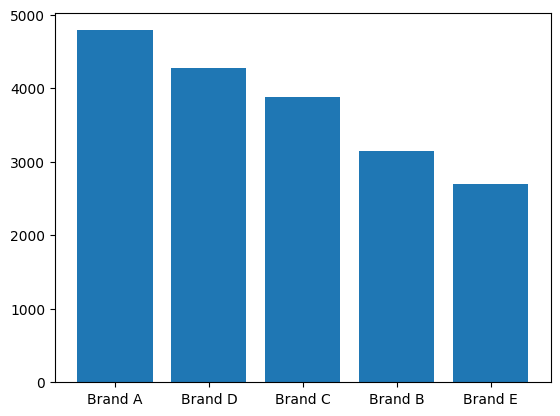

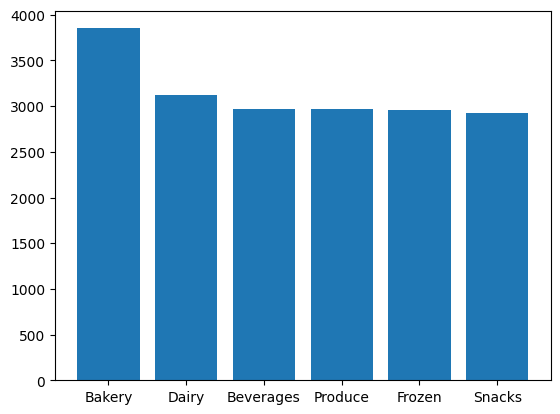

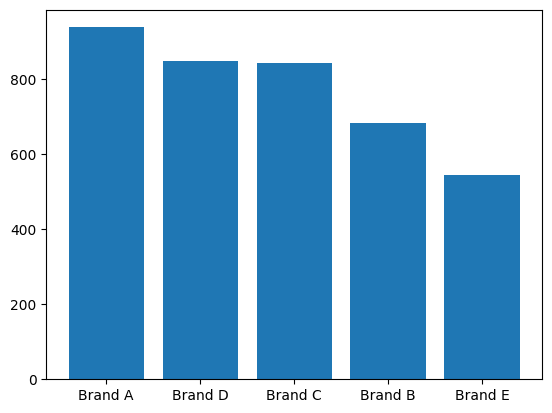

     Brand  Customer_Ratings  Percentage
0  Brand A            4791.3   25.491198
3  Brand D            4281.5   22.778904
2  Brand C            3879.2   20.638544
1  Brand B            3142.0   16.716412
4  Brand E            2701.9   14.374943
    Category  Customer_Ratings  Percentage
0     Bakery            3852.1   20.494363
2      Dairy            3125.9   16.630755
1  Beverages            2972.5   15.814619
4    Produce            2963.7   15.767800
3     Frozen            2959.5   15.745455
5     Snacks            2922.2   15.547008
      Brand   Category  Customer_Ratings  Percentage
0   Brand A     Bakery             937.4    4.987258
2   Brand A      Dairy             881.1    4.687724
4   Brand A    Produce             862.8    4.590363
18  Brand D     Bakery             847.1    4.506834
12  Brand C     Bakery             841.9    4.479168
19  Brand D  Beverages             730.4    3.885954
3   Brand A     Frozen             729.0    3.878505
23  Brand D     Snacks       

In [29]:
# Popular Brands and Categories by Customer Ratings
BrandCustomer_Ratings = Grocery_data.groupby(["Brand"],as_index = False,sort = True)[["Customer_Ratings"]].sum().assign(Percentage=lambda x: (x["Customer_Ratings"] / x["Customer_Ratings"].sum()) * 100).sort_values(["Percentage"],ascending = False)
CategoryCustomer_Ratings = Grocery_data.groupby(["Category"],as_index = False,sort = True)[["Customer_Ratings"]].sum().assign(Percentage=lambda x: (x["Customer_Ratings"] / x["Customer_Ratings"].sum()) * 100).sort_values(["Percentage"],ascending = False)
BrandCategoryCustomer_Ratings = Grocery_data.groupby(["Brand","Category"],as_index = False,sort = True)[["Customer_Ratings"]].sum().assign(Percentage=lambda x: (x["Customer_Ratings"] / x["Customer_Ratings"].sum()) * 100).sort_values(["Percentage"],ascending = False)
plt.bar(BrandCustomer_Ratings['Brand'],BrandCustomer_Ratings['Customer_Ratings'])
plt.show()
plt.bar(CategoryCustomer_Ratings['Category'],CategoryCustomer_Ratings['Customer_Ratings'])
plt.show()
plt.bar(BrandCategoryCustomer_Ratings['Brand'],BrandCategoryCustomer_Ratings['Customer_Ratings'])
plt.show()
print(BrandCustomer_Ratings)
print(CategoryCustomer_Ratings)
print(BrandCategoryCustomer_Ratings)

In [30]:
# Top 25% Performers by Customer Ratings
print(BrandCustomer_Ratings.loc[BrandCustomer_Ratings['Percentage'] > BrandCustomer_Ratings['Percentage'].quantile(0.75)])
print(CategoryCustomer_Ratings.loc[CategoryCustomer_Ratings['Percentage'] > CategoryCustomer_Ratings['Percentage'].quantile(0.75)])
print(BrandCategoryCustomer_Ratings.loc[BrandCategoryCustomer_Ratings['Percentage'] > BrandCategoryCustomer_Ratings['Percentage'].quantile(0.75)])

     Brand  Customer_Ratings  Percentage
0  Brand A            4791.3   25.491198
  Category  Customer_Ratings  Percentage
0   Bakery            3852.1   20.494363
2    Dairy            3125.9   16.630755
      Brand   Category  Customer_Ratings  Percentage
0   Brand A     Bakery             937.4    4.987258
2   Brand A      Dairy             881.1    4.687724
4   Brand A    Produce             862.8    4.590363
18  Brand D     Bakery             847.1    4.506834
12  Brand C     Bakery             841.9    4.479168
19  Brand D  Beverages             730.4    3.885954
3   Brand A     Frozen             729.0    3.878505
23  Brand D     Snacks             710.9    3.782208


In [31]:
# Bottom 25% Performers by Customer Ratings
print(BrandCustomer_Ratings.loc[BrandCustomer_Ratings['Percentage'] < BrandCustomer_Ratings['Percentage'].quantile(0.25)])
print(CategoryCustomer_Ratings.loc[CategoryCustomer_Ratings['Percentage'] < CategoryCustomer_Ratings['Percentage'].quantile(0.25)])
print(BrandCategoryCustomer_Ratings.loc[BrandCategoryCustomer_Ratings['Percentage'] < BrandCategoryCustomer_Ratings['Percentage'].quantile(0.25)])

     Brand  Customer_Ratings  Percentage
4  Brand E            2701.9   14.374943
  Category  Customer_Ratings  Percentage
3   Frozen            2959.5   15.745455
5   Snacks            2922.2   15.547008
      Brand   Category  Customer_Ratings  Percentage
11  Brand B     Snacks             478.0    2.543108
26  Brand E      Dairy             470.9    2.505334
7   Brand B  Beverages             470.8    2.504802
10  Brand B    Produce             469.3    2.496821
27  Brand E     Frozen             457.8    2.435638
29  Brand E     Snacks             417.7    2.222293
28  Brand E    Produce             406.7    2.163770
25  Brand E  Beverages             404.8    2.153661


In [32]:
# Top 5% Products by Customer Ratings
Product_by_Ratings = Grocery_data.groupby("Product_Name")[["Customer_Ratings"]].sum().sort_values("Customer_Ratings",ascending=False)
Top_25_Products = Product_by_Ratings.quantile(0.75)
print(Product_by_Ratings.loc[Product_by_Ratings['Customer_Ratings'] > Product_by_Ratings['Customer_Ratings'].quantile(0.95)])

              Customer_Ratings
Product_Name                  
Product 234                5.0
Product 2276               5.0
Product 101                5.0
Product 1008               5.0
Product 3691               5.0
Product 1638               5.0
Product 1609               5.0
Product 4629               5.0
Product 4602               5.0
Product 3754               5.0
Product 3646               5.0
Product 4683               5.0
Product 1295               5.0
Product 387                5.0
Product 126                5.0
Product 4832               5.0
Product 351                5.0
Product 3955               5.0
Product 2592               5.0
Product 809                5.0
Product 2378               5.0
Product 3925               5.0
Product 1222               5.0
Product 3312               5.0
Product 3179               5.0
Product 1895               5.0
Product 3210               5.0
Product 4080               5.0
Product 4052               5.0
Product 541                5.0
Product 

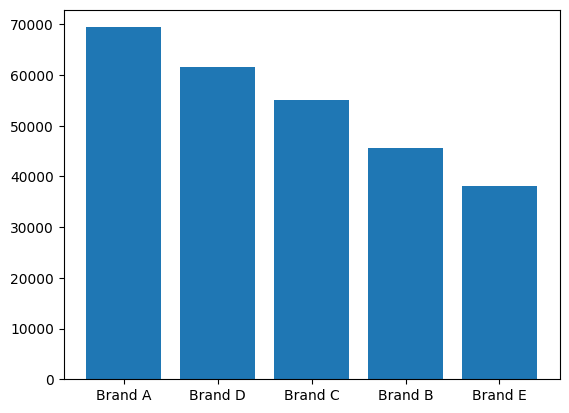

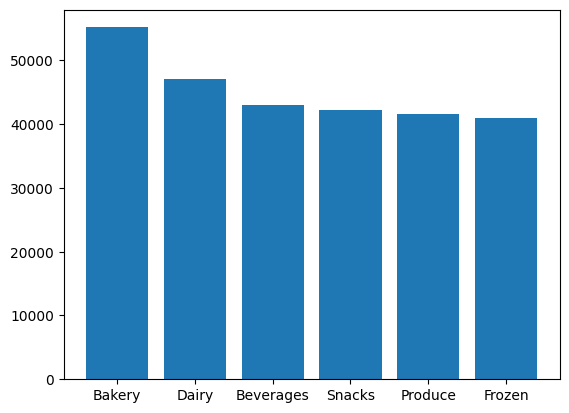

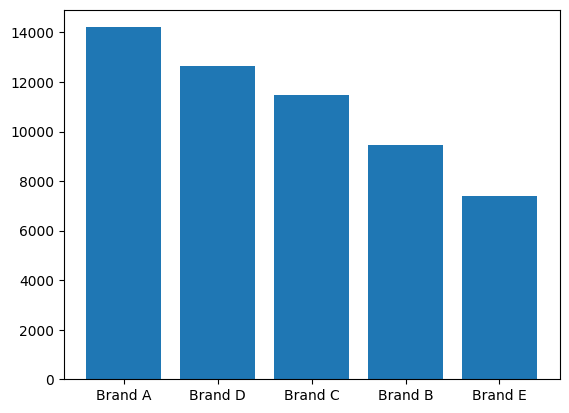

     Brand  Frequency_of_Purchase  Percentage
0  Brand A                69430.0   25.717482
3  Brand D                61681.0   22.847184
2  Brand C                55126.0   20.419155
1  Brand B                45546.0   16.870638
4  Brand E                38189.0   14.145541
    Category  Frequency_of_Purchase  Percentage
0     Bakery                55183.0   20.440268
2      Dairy                47064.0   17.432919
1  Beverages                42928.0   15.900908
5     Snacks                42210.0   15.634955
4    Produce                41560.0   15.394189
3     Frozen                41027.0   15.196761
      Brand   Category  Frequency_of_Purchase  Percentage
0   Brand A     Bakery                14210.0    5.263509
2   Brand A      Dairy                12803.0    4.742344
18  Brand D     Bakery                12655.0    4.687523
4   Brand A    Produce                12190.0    4.515283
12  Brand C     Bakery                11470.0    4.248589
19  Brand D  Beverages                10

In [33]:
# Brands and Categories Distribution by Purchase Frequency
BrandFrequency_of_Purchase = Grocery_data.groupby(["Brand"],as_index = False,sort = True)[['Frequency_of_Purchase']].sum().assign(Percentage=lambda x: (x["Frequency_of_Purchase"] / x["Frequency_of_Purchase"].sum()) * 100).sort_values(["Percentage"],ascending = False)
CategoryFrequency_of_Purchase = Grocery_data.groupby(["Category"],as_index = False,sort = True)[["Frequency_of_Purchase"]].sum().assign(Percentage=lambda x: (x["Frequency_of_Purchase"] / x["Frequency_of_Purchase"].sum()) * 100).sort_values(["Percentage"],ascending = False)
BrandCategoryFrequency_of_Purchase = Grocery_data.groupby(["Brand","Category"],as_index = False,sort = True)[["Frequency_of_Purchase"]].sum().assign(Percentage=lambda x: (x["Frequency_of_Purchase"] / x["Frequency_of_Purchase"].sum()) * 100).sort_values(["Percentage"],ascending = False)
plt.bar(BrandFrequency_of_Purchase['Brand'],BrandFrequency_of_Purchase['Frequency_of_Purchase'])
plt.show()
plt.bar(CategoryFrequency_of_Purchase['Category'],CategoryFrequency_of_Purchase['Frequency_of_Purchase'])
plt.show()
plt.bar(BrandCategoryFrequency_of_Purchase['Brand'],BrandCategoryFrequency_of_Purchase['Frequency_of_Purchase'])
plt.show()
print(BrandFrequency_of_Purchase)
print(CategoryFrequency_of_Purchase)
print(BrandCategoryFrequency_of_Purchase)

In [34]:
# Top 25% Performers by Purchase Frequency
print(BrandFrequency_of_Purchase.loc[BrandFrequency_of_Purchase['Percentage'] > BrandFrequency_of_Purchase['Percentage'].quantile(0.75)])
print(CategoryFrequency_of_Purchase.loc[CategoryFrequency_of_Purchase['Percentage'] > CategoryFrequency_of_Purchase['Percentage'].quantile(0.75)])
print(BrandCategoryFrequency_of_Purchase.loc[BrandCategoryFrequency_of_Purchase['Percentage'] > BrandCategoryFrequency_of_Purchase['Percentage'].quantile(0.75)])

     Brand  Frequency_of_Purchase  Percentage
0  Brand A                69430.0   25.717482
  Category  Frequency_of_Purchase  Percentage
0   Bakery                55183.0   20.440268
2    Dairy                47064.0   17.432919
      Brand   Category  Frequency_of_Purchase  Percentage
0   Brand A     Bakery                14210.0    5.263509
2   Brand A      Dairy                12803.0    4.742344
18  Brand D     Bakery                12655.0    4.687523
4   Brand A    Produce                12190.0    4.515283
12  Brand C     Bakery                11470.0    4.248589
19  Brand D  Beverages                10408.0    3.855215
5   Brand A     Snacks                10265.0    3.802246
20  Brand D      Dairy                10247.0    3.795579


In [35]:
# Bottom 25% Performers by Purchase Frequency
print(BrandFrequency_of_Purchase.loc[BrandFrequency_of_Purchase['Percentage'] < BrandFrequency_of_Purchase['Percentage'].quantile(0.25)])
print(CategoryFrequency_of_Purchase.loc[CategoryFrequency_of_Purchase['Percentage'] < CategoryFrequency_of_Purchase['Percentage'].quantile(0.25)])
print(BrandCategoryFrequency_of_Purchase.loc[BrandCategoryFrequency_of_Purchase['Percentage'] < BrandCategoryFrequency_of_Purchase['Percentage'].quantile(0.25)])

     Brand  Frequency_of_Purchase  Percentage
4  Brand E                38189.0   14.145541
  Category  Frequency_of_Purchase  Percentage
4  Produce                41560.0   15.394189
3   Frozen                41027.0   15.196761
      Brand   Category  Frequency_of_Purchase  Percentage
9   Brand B     Frozen                 7041.0    2.608048
11  Brand B     Snacks                 6938.0    2.569896
10  Brand B    Produce                 6796.0    2.517298
26  Brand E      Dairy                 6627.0    2.454699
29  Brand E     Snacks                 6599.0    2.444328
27  Brand E     Frozen                 6352.0    2.352837
28  Brand E    Produce                 5722.0    2.119479
25  Brand E  Beverages                 5488.0    2.032803


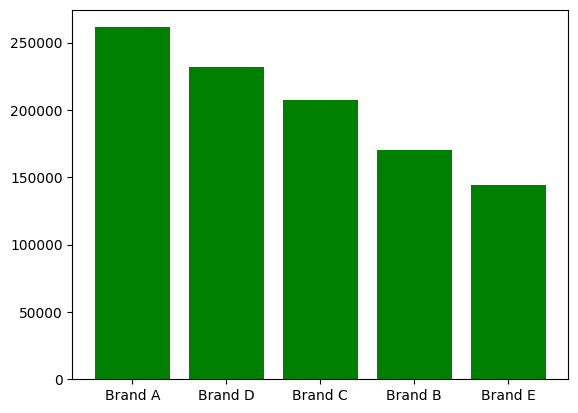

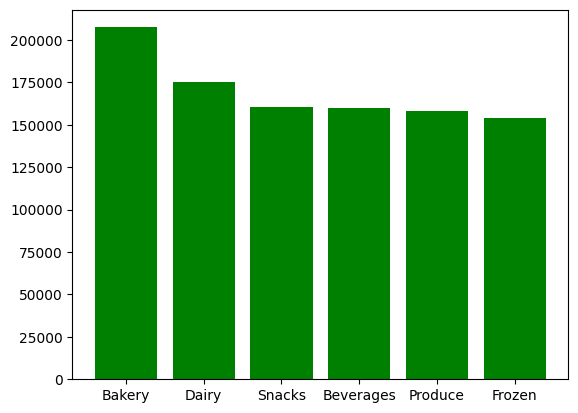

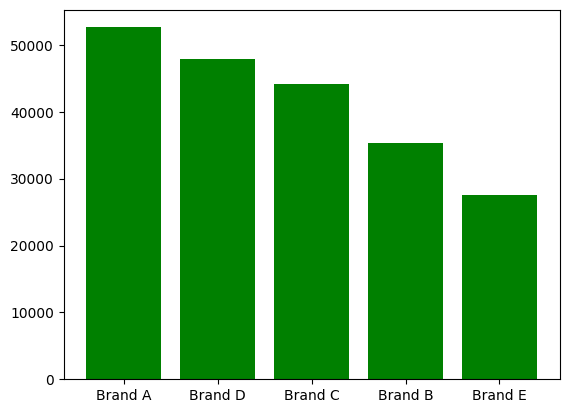

     Brand  Customer_Rating_Proxy  Percentage
0  Brand A               261303.2   25.735664
3  Brand D               232088.9   22.858357
2  Brand C               207501.2   20.436723
1  Brand B               170145.6   16.757582
4  Brand E               144296.1   14.211674
    Category  Customer_Rating_Proxy  Percentage
0     Bakery               207507.4   20.437333
2      Dairy               175093.7   17.244919
5     Snacks               160540.1   15.811540
1  Beverages               159988.2   15.757184
4    Produce               158076.7   15.568921
3     Frozen               154128.9   15.180103
      Brand   Category  Customer_Rating_Proxy  Percentage
0   Brand A     Bakery                52624.6    5.182979
2   Brand A      Dairy                48233.4    4.750491
18  Brand D     Bakery                47828.7    4.710632
4   Brand A    Produce                46405.5    4.570462
12  Brand C     Bakery                44172.5    4.350535
5   Brand A     Snacks                39

In [54]:
# Popular Brands and Categories by Customer Rating Proxy
BrandCustomer_Rating_Proxy = Grocery_data.groupby(["Brand"],as_index = False,sort = True)[['Customer_Rating_Proxy']].sum().assign(Percentage=lambda x: (x["Customer_Rating_Proxy"] / x["Customer_Rating_Proxy"].sum()) * 100).sort_values(["Percentage"],ascending = False)
CategoryCustomer_Rating_Proxy = Grocery_data.groupby(["Category"],as_index = False,sort = True)[["Customer_Rating_Proxy"]].sum().assign(Percentage=lambda x: (x["Customer_Rating_Proxy"] / x["Customer_Rating_Proxy"].sum()) * 100).sort_values(["Percentage"],ascending = False)
BrandCategoryCustomer_Rating_Proxy = Grocery_data.groupby(["Brand","Category"],as_index = False,sort = True)[["Customer_Rating_Proxy"]].sum().assign(Percentage=lambda x: (x["Customer_Rating_Proxy"] / x["Customer_Rating_Proxy"].sum()) * 100).sort_values(["Percentage"],ascending = False)
plt.bar(BrandCustomer_Rating_Proxy['Brand'],BrandCustomer_Rating_Proxy['Customer_Rating_Proxy'],color="green")
plt.show()
plt.bar(CategoryCustomer_Rating_Proxy['Category'],CategoryCustomer_Rating_Proxy['Customer_Rating_Proxy'],color="green")
plt.show()
plt.bar(BrandCategoryCustomer_Rating_Proxy['Brand'],BrandCategoryCustomer_Rating_Proxy['Customer_Rating_Proxy'],color="green")
plt.show()
print(BrandCustomer_Rating_Proxy)
print(CategoryCustomer_Rating_Proxy)
print(BrandCategoryCustomer_Rating_Proxy)

In [37]:
# Top 25% Performers by Customer Ratings Proxy
print(BrandCustomer_Rating_Proxy.loc[BrandCustomer_Rating_Proxy['Percentage'] > BrandCustomer_Rating_Proxy['Percentage'].quantile(0.75)])
print(CategoryCustomer_Rating_Proxy.loc[CategoryCustomer_Rating_Proxy['Percentage'] > CategoryCustomer_Rating_Proxy['Percentage'].quantile(0.75)])
print(BrandCategoryCustomer_Rating_Proxy.loc[BrandCategoryCustomer_Rating_Proxy['Percentage'] > BrandCategoryCustomer_Rating_Proxy['Percentage'].quantile(0.75)])

     Brand  Customer_Rating_Proxy  Percentage
0  Brand A               261303.2   25.735664
  Category  Customer_Rating_Proxy  Percentage
0   Bakery               207507.4   20.437333
2    Dairy               175093.7   17.244919
      Brand   Category  Customer_Rating_Proxy  Percentage
0   Brand A     Bakery                52624.6    5.182979
2   Brand A      Dairy                48233.4    4.750491
18  Brand D     Bakery                47828.7    4.710632
4   Brand A    Produce                46405.5    4.570462
12  Brand C     Bakery                44172.5    4.350535
5   Brand A     Snacks                39095.3    3.850483
19  Brand D  Beverages                39018.4    3.842909
3   Brand A     Frozen                38367.1    3.778763


In [38]:
# Bottom 25% Performers by Customer Ratings Proxy
print(BrandCustomer_Rating_Proxy.loc[BrandCustomer_Rating_Proxy['Percentage'] < BrandCustomer_Rating_Proxy['Percentage'].quantile(0.25)])
print(CategoryCustomer_Rating_Proxy.loc[CategoryCustomer_Rating_Proxy['Percentage'] < CategoryCustomer_Rating_Proxy['Percentage'].quantile(0.25)])
print(BrandCategoryCustomer_Rating_Proxy.loc[BrandCategoryCustomer_Rating_Proxy['Percentage'] < BrandCategoryCustomer_Rating_Proxy['Percentage'].quantile(0.25)])

     Brand  Customer_Rating_Proxy  Percentage
4  Brand E               144296.1   14.211674
  Category  Customer_Rating_Proxy  Percentage
4  Produce               158076.7   15.568921
3   Frozen               154128.9   15.180103
      Brand   Category  Customer_Rating_Proxy  Percentage
11  Brand B     Snacks                26717.7    2.631417
9   Brand B     Frozen                26304.5    2.590721
10  Brand B    Produce                25737.9    2.534917
26  Brand E      Dairy                25319.1    2.493670
29  Brand E     Snacks                24853.7    2.447832
27  Brand E     Frozen                24062.8    2.369937
28  Brand E    Produce                21475.0    2.115065
25  Brand E  Beverages                21066.0    2.074783


In [39]:
# Correlation of ratings and frequency
Grocery_data['Customer_Ratings'].corr(Grocery_data['Frequency_of_Purchase'])


np.float64(-0.010704571343810636)

In [40]:
# Correlation of ratings and sales
Grocery_data['Customer_Ratings'].corr(Grocery_data['Sales'])


np.float64(-0.0038856284142064)

     Brand  Units_Sold
0  Brand A   4490163.0
3  Brand D   3976260.0
2  Brand C   3589374.0
1  Brand B   2935247.0
4  Brand E   2490331.0
    Category  Units_Sold
0     Bakery   3534091.0
2      Dairy   2931170.0
3     Frozen   2838597.0
1  Beverages   2749882.0
4    Produce   2743077.0
5     Snacks   2684558.0
      Brand   Category  Units_Sold
0   Brand A     Bakery    845724.0
2   Brand A      Dairy    825099.0
4   Brand A    Produce    797491.0
18  Brand D     Bakery    794998.0
12  Brand C     Bakery    777062.0
3   Brand A     Frozen    709316.0
5   Brand A     Snacks    674137.0
23  Brand D     Snacks    659152.0
19  Brand D  Beverages    657692.0
13  Brand C  Beverages    640941.0
1   Brand A  Beverages    638396.0
21  Brand D     Frozen    638320.0
6   Brand B     Bakery    629562.0
20  Brand D      Dairy    620230.0
22  Brand D    Produce    605868.0
14  Brand C      Dairy    566835.0
17  Brand C     Snacks    547095.0
15  Brand C     Frozen    543478.0
16  Brand C    Produce

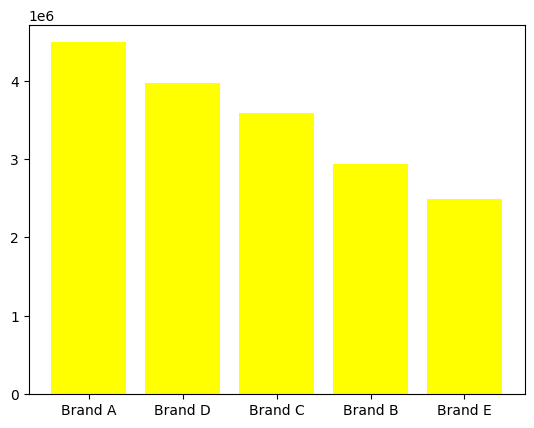

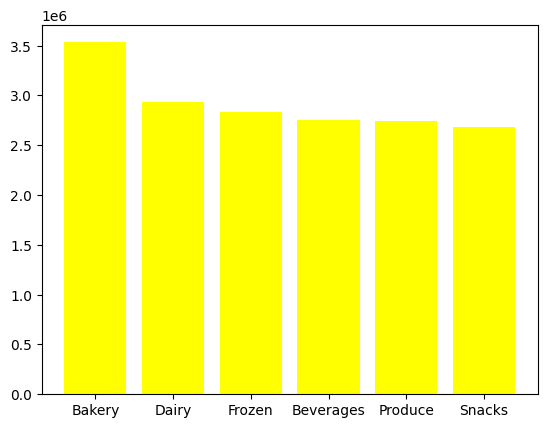

In [65]:
# Slow Moving Brands and Categories
Brands_Units_Sold = Grocery_data.groupby(["Brand"],as_index= False)["Units_Sold"].sum().sort_values("Units_Sold",ascending = False)
Category_Units_Sold = Grocery_data.groupby(["Category"],as_index= False)["Units_Sold"].sum().sort_values("Units_Sold",ascending = False)
BrandCategory_Units_Sold = Grocery_data.groupby(["Brand","Category"],as_index= False)["Units_Sold"].sum().sort_values("Units_Sold",ascending = False)
print(Brands_Units_Sold)
print(Category_Units_Sold)
print(BrandCategory_Units_Sold)
plt.bar(Brands_Units_Sold['Brand'],Brands_Units_Sold['Units_Sold'],color="Yellow")
plt.show()
plt.bar(Category_Units_Sold['Category'],Category_Units_Sold['Units_Sold'],color="Yellow")
plt.show()


In [58]:
# Slow moving items
# Items whose no of units are sold less.
z = Grocery_data[['Product_Name','Units_Sold']].sort_values('Units_Sold',ascending=True)
z['Units_Sold'].quantile(0.25)
z['Units_Sold'].quantile(0.75)
h = z.loc[z['Units_Sold'] < z['Units_Sold'].quantile(0.05)]
h.head(20)

,Product_Name,Units_Sold
2059,Product 2060,188.0
2597,Product 2598,248.0
1275,Product 1276,306.0
3089,Product 3090,327.0
2193,Product 2194,379.0
3460,Product 3461,400.0
3776,Product 3777,406.0
2122,Product 2123,442.0
3356,Product 3357,443.0
960,Product 961,472.0


In [43]:
# Shelf Space Utilization
# Over Utilization
x = Grocery_data[['Product_Name','Units_Sold_Per_Shelf_Space']].sort_values('Units_Sold_Per_Shelf_Space',ascending=False)
x = x.loc[x['Units_Sold_Per_Shelf_Space'] > x['Units_Sold_Per_Shelf_Space'].quantile(0.75)]
y = Grocery_data[['Product_Name','Sales_Per_Shelf_Space']].sort_values('Sales_Per_Shelf_Space',ascending=False)
y = y.loc[y['Sales_Per_Shelf_Space'] > y['Sales_Per_Shelf_Space'].quantile(0.75)]
z = Grocery_data[['Product_Name','Gross_Margin_Per_Shelf_Space']].sort_values('Gross_Margin_Per_Shelf_Space',ascending=False)
z = z.loc[z['Gross_Margin_Per_Shelf_Space'] > z['Gross_Margin_Per_Shelf_Space'].quantile(0.75)]
xy = pd.merge(x[['Product_Name']], y[['Product_Name']], on='Product_Name')
xyz = pd.merge(xy, z[['Product_Name']], on='Product_Name')
xyz




,Product_Name
0,Product 4603
1,Product 3352
2,Product 2399
3,Product 1064
4,Product 4787
...,...
602,Product 726
603,Product 2850
604,Product 2671
605,Product 799


In [44]:
# Shelf Space Utilization
# Under Utilization
x = Grocery_data[['Product_Name','Units_Sold_Per_Shelf_Space']].sort_values('Units_Sold_Per_Shelf_Space',ascending=False)
x = x.loc[x['Units_Sold_Per_Shelf_Space'] < x['Units_Sold_Per_Shelf_Space'].quantile(0.25)]
y = Grocery_data[['Product_Name','Sales_Per_Shelf_Space']].sort_values('Sales_Per_Shelf_Space',ascending=False)
y = y.loc[y['Sales_Per_Shelf_Space'] < y['Sales_Per_Shelf_Space'].quantile(0.25)]
z = Grocery_data[['Product_Name','Gross_Margin_Per_Shelf_Space']].sort_values('Gross_Margin_Per_Shelf_Space',ascending=False)
z = z.loc[z['Gross_Margin_Per_Shelf_Space'] < z['Gross_Margin_Per_Shelf_Space'].quantile(0.25)]
xy = pd.merge(x[['Product_Name']], y[['Product_Name']], on='Product_Name')
xyz = pd.merge(xy, z[['Product_Name']], on='Product_Name')
xyz

,Product_Name
0,Product 4340
1,Product 778
2,Product 3716
3,Product 1558
4,Product 1377
...,...
175,Product 1563
176,Product 4649
177,Product 4550
178,Product 2374


In [68]:
Grocery_data.columns

Index(['Product_ID', 'Category', 'Product_Name', 'Brand', 'Price', 'Cost',
       'Units_Sold', 'SKU', 'Shelf_Space', 'Customer_Ratings',
       'Frequency_of_Purchase', 'Sales', 'Gross_Margin', 'Total_Customers',
       'Total_Transactions', 'Sales_Per_Customer', 'Transaction_Per_Customer',
       'Customer_Rating_Proxy', 'Sales_Per_Shelf_Space',
       'Gross_Margin_Per_Shelf_Space', 'Units_Sold_Per_Shelf_Space',
       'Profit_Per_Shelf_Space', 'Gross_Margin_Per_Units_Sold', 'Sales_N',
       'Gross_Margin_N', 'Sales_Per_Customer_N', 'Customer_Rating_Proxy_N',
       'Sales_Per_Shelf_Space_N', 'Gross_Margin_Per_Shelf_Space_N',
       'Units_Sold_Per_Shelf_Space_N', 'Profit_Per_Shelf_Space_N',
       'Customer_Ratings_N', 'Frequency_of_Purchase_N', 'Units_Sold_N',
       'Final_Performance_Score'],
      dtype='object')

In [69]:
# Feature Normalization of KPI's
Grocery_data["Sales_N"] = (Grocery_data['Sales'] -Grocery_data['Sales'].min())/ (Grocery_data['Sales'].max()-Grocery_data['Sales'].min())
Grocery_data["Gross_Margin_N"] = (Grocery_data['Gross_Margin'] -Grocery_data['Gross_Margin'].min())/ (Grocery_data['Gross_Margin'].max()-Grocery_data['Gross_Margin'].min())
Grocery_data["Sales_Per_Customer_N"] = (Grocery_data['Sales_Per_Customer'] -Grocery_data['Sales_Per_Customer'].min())/ (Grocery_data['Sales_Per_Customer'].max()-Grocery_data['Sales_Per_Customer'].min())
Grocery_data["Customer_Rating_Proxy_N"] = (Grocery_data['Customer_Rating_Proxy'] -Grocery_data['Customer_Rating_Proxy'].min())/ (Grocery_data['Customer_Rating_Proxy'].max()-Grocery_data['Customer_Rating_Proxy'].min())
Grocery_data["Sales_Per_Shelf_Space_N"] = (Grocery_data['Sales_Per_Shelf_Space'] -Grocery_data['Sales_Per_Shelf_Space'].min())/ (Grocery_data['Sales_Per_Shelf_Space'].max()-Grocery_data['Sales_Per_Shelf_Space'].min())
Grocery_data["Gross_Margin_Per_Shelf_Space_N"] = (Grocery_data['Gross_Margin_Per_Shelf_Space'] -Grocery_data['Gross_Margin_Per_Shelf_Space'].min())/ (Grocery_data['Gross_Margin_Per_Shelf_Space'].max()-Grocery_data['Gross_Margin_Per_Shelf_Space'].min())
Grocery_data["Units_Sold_Per_Shelf_Space_N"] = (Grocery_data['Units_Sold_Per_Shelf_Space'] -Grocery_data['Units_Sold_Per_Shelf_Space'].min())/ (Grocery_data['Units_Sold_Per_Shelf_Space'].max()-Grocery_data['Units_Sold_Per_Shelf_Space'].min())
Grocery_data["Profit_Per_Shelf_Space_N"] = (Grocery_data['Profit_Per_Shelf_Space'] -Grocery_data['Profit_Per_Shelf_Space'].min())/ (Grocery_data['Profit_Per_Shelf_Space'].max()-Grocery_data['Profit_Per_Shelf_Space'].min())
Grocery_data["Customer_Ratings_N"] = (Grocery_data['Customer_Ratings'] -Grocery_data['Customer_Ratings'].min())/ (Grocery_data['Customer_Ratings'].max()-Grocery_data['Customer_Ratings'].min())
Grocery_data["Frequency_of_Purchase_N"] = (Grocery_data['Frequency_of_Purchase'] -Grocery_data['Frequency_of_Purchase'].min())/ (Grocery_data['Frequency_of_Purchase'].max()-Grocery_data['Frequency_of_Purchase'].min())
Grocery_data["Units_Sold_N"] = (Grocery_data['Units_Sold'] -Grocery_data['Units_Sold'].min())/ (Grocery_data['Units_Sold'].max()-Grocery_data['Units_Sold'].min())

In [70]:
Grocery_data.columns

Index(['Product_ID', 'Category', 'Product_Name', 'Brand', 'Price', 'Cost',
       'Units_Sold', 'SKU', 'Shelf_Space', 'Customer_Ratings',
       'Frequency_of_Purchase', 'Sales', 'Gross_Margin', 'Total_Customers',
       'Total_Transactions', 'Sales_Per_Customer', 'Transaction_Per_Customer',
       'Customer_Rating_Proxy', 'Sales_Per_Shelf_Space',
       'Gross_Margin_Per_Shelf_Space', 'Units_Sold_Per_Shelf_Space',
       'Profit_Per_Shelf_Space', 'Gross_Margin_Per_Units_Sold', 'Sales_N',
       'Gross_Margin_N', 'Sales_Per_Customer_N', 'Customer_Rating_Proxy_N',
       'Sales_Per_Shelf_Space_N', 'Gross_Margin_Per_Shelf_Space_N',
       'Units_Sold_Per_Shelf_Space_N', 'Profit_Per_Shelf_Space_N',
       'Customer_Ratings_N', 'Frequency_of_Purchase_N', 'Units_Sold_N',
       'Final_Performance_Score'],
      dtype='object')

In [89]:
# Final Perfrormance Score
Grocery_data["Final_Performance_Score"] = Grocery_data['Sales_N'] + Grocery_data['Gross_Margin_N'] + Grocery_data['Sales_Per_Customer_N'] +Grocery_data['Customer_Rating_Proxy_N'] +Grocery_data['Sales_Per_Shelf_Space_N'] +Grocery_data['Gross_Margin_Per_Shelf_Space_N'] +Grocery_data['Units_Sold_Per_Shelf_Space_N'] +Grocery_data['Profit_Per_Shelf_Space_N'] + Grocery_data['Units_Sold_N']



In [98]:
# Top 10 low performance score
x = Grocery_data[["Brand","Category","Product_Name","Final_Performance_Score","Sales","Shelf_Space","Customer_Ratings","Customer_Rating_Proxy"]].sort_values("Final_Performance_Score",ascending=False)
# 25% to 75%
y = x.loc[(x['Final_Performance_Score'] > x['Final_Performance_Score'].quantile(0.25)) & (x['Final_Performance_Score'] < x['Final_Performance_Score'].quantile(0.75))]
spacez = y['Shelf_Space'].sum()
countz = y['Product_Name'].count()
scorez = y['Final_Performance_Score'].sum()
print(spacez)
print(countz)
print(scorez)

7184.27
2495
7400.135654828361


In [91]:
Grocery_data['Customer_Rating_Proxy'].mean()

np.float64(203.35169236931705)

In [96]:
# less than 25%
z = x.loc[(x['Final_Performance_Score'] < x['Final_Performance_Score'].quantile(0.25))]
spacez = z['Shelf_Space'].sum()
countz = z.count()
scorez = z['Final_Performance_Score'].sum()
print(spacez)
print(countz)
print(scorez)


3672.79
Brand                      1248
Category                   1248
Product_Name               1248
Final_Performance_Score    1248
Sales                      1248
Shelf_Space                1248
Customer_Ratings           1248
Customer_Rating_Proxy      1248
dtype: int64
2665.060889908841


In [99]:
# Greater than 75%
z = x.loc[(x['Final_Performance_Score'] > x['Final_Performance_Score'].quantile(0.75))]
spacez = z['Shelf_Space'].sum()
countz = z['Product_Name'].count()
scorez = z['Final_Performance_Score'].sum()
print(spacez)
print(countz)
print(scorez)

2740.69
1248
5208.916644653034


In [53]:
# plt.bar(x['Brand'],x['Sales'])
# plt.show()
# plt.bar(x['Category'],x['Sales'])
# plt.show()


# x["Brand_Category"] = x["Brand"] + " - " + x["Category"]
# plt.figure(figsize=(10,5))
# plt.bar(x["Brand_Category"], x["Sales"])
# plt.xticks(rotation=90)
# plt.show()
